In [24]:
from openeye.oechem import *
from openeye.oedepict import *
import oenotebook as oenb
from IPython.display import display
import os
smile = "c1ccccc1"
file = "./targets.ism"

,Molecule
0,
1,
2,
3,
4,

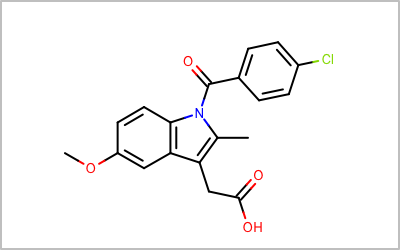
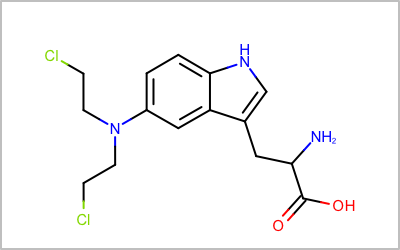
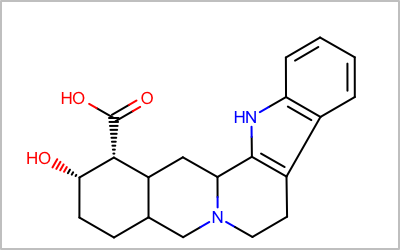
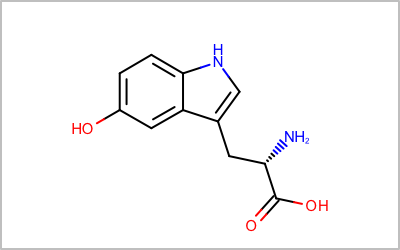
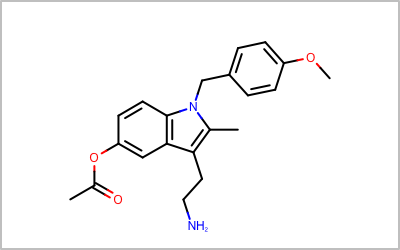

In [25]:
#need to change so maybe prints first files
#need to use interactive to make widget out of entire function.
data = oenb.read_file_to_dataframe(file)
oenb.render_dataframe(data.head())

### Substructure searching with pandas

In [26]:
qmol = OEGraphMol()
OEParseSmiles(qmol, smile)
ss = OESubSearch(smile)
ifs = oemolistream()
ifs.open(file)
mollist = []
for mol in ifs.GetOEGraphMols():
    mollist.append(OEGraphMol(mol))
    OEPrepareSearch(mol, ss)

,Molecule,Sub Structure Search Hits
0,,*' at 0x10f9d63f0> >
1,,*' at 0x10f9d69c0> >
2,,*' at 0x10f9d6a50> >
3,,*' at 0x10f9d6a80> >
4,,*' at 0x10f9d6ab0> >

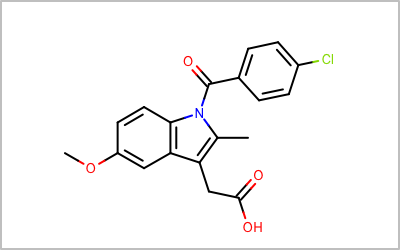
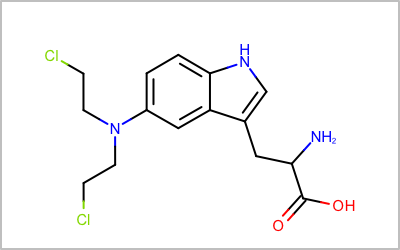
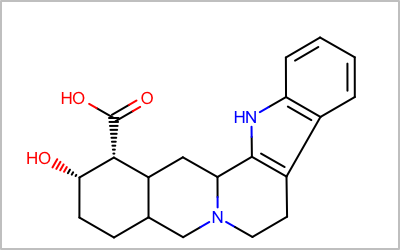
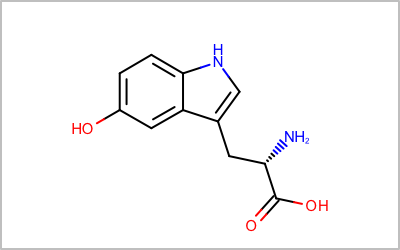
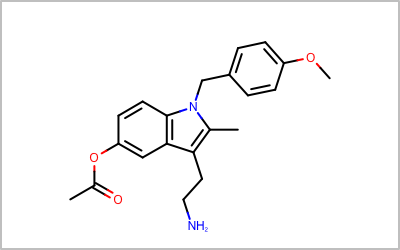

In [27]:
data["Sub Structure Search Hits"] = data.Molecule.apply(ss.Match)
oenb.render_dataframe(data.head())

#### Makes an index file, and depicts the substructures with highlights

In [28]:
def MainSubstructure(file, smile):
    ifs = oemolistream()
    if not ifs.open(file):
        print("Cannot open target input file!")
    if not isinstance(smile, str):
        print("please input query in smile format")
    width = 400.0
    height = 400.0
    opts = OE2DMolDisplayOptions(width, height, OEScale_AutoScale)
    image = OEImage(width, height)
    colors = OEGetContrastColors()
    qmol = OEGraphMol()
    OEParseSmiles(qmol, smile)
    ss = OESubSearch(smile)
    mollist = []
    for mol in ifs.GetOEGraphMols():
        mollist.append(OEGraphMol(mol))
        OEPrepareSearch(mol, ss)
    DepictMoleculesWithSubstructureMatches(image, mollist,opts,colors, smile)
    CreateMolDatabaseIndexFile(file)

def CreateMolDatabaseIndexFile(file):
    idxfname = OEGetMolDatabaseIdxFileName(file)
    if os.path.exists(idxfname):
        OEThrow.Warning("%s index file already exists" % idxfname)
    elif not OECreateMolDatabaseIdx(file):
        OEThrow.Warning("Unable to create " + str(idxfname) + "molecule index file")

def DepictMoleculesWithSubstructureMatches(image, mollist, opts, colors, smile):

    highlight = OEHighlightOverlayByBallAndStick(colors)
    borderpen = OEPen(OEWhite, OELightGrey, OEFill_Off, 1.0)
    count = 0
    ss = OESubSearch(smile)
    for mol in mollist:
        if ss.SingleMatch(mol):
            count = count + 1
            OEPrepareDepiction(mol)
            disp = OE2DMolDisplay(mol, opts)
            OEAddHighlightOverlay(disp, highlight, ss.Match(mol))
            OERenderMolecule(image, disp)
            OEDrawBorder(image, borderpen)
            display(oenb.draw_oeimage(image))
    print("The number of matching molecules is: "+ str(count))
    nomatch = (len(mollist) - count)
    print("The number of nonmatching molecules is: "+ str(nomatch))

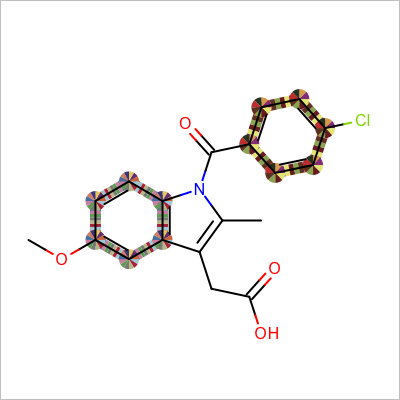

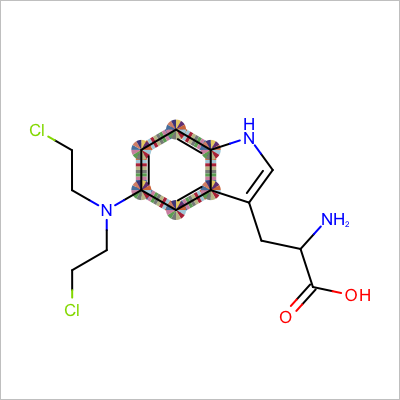

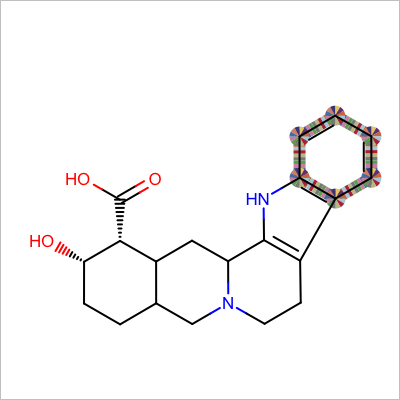

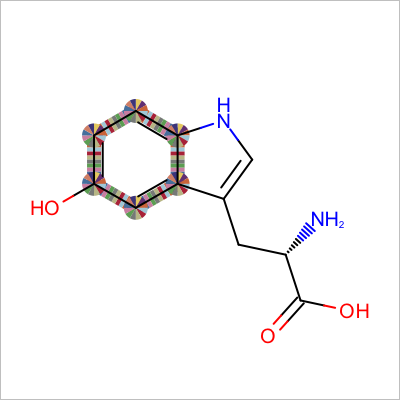

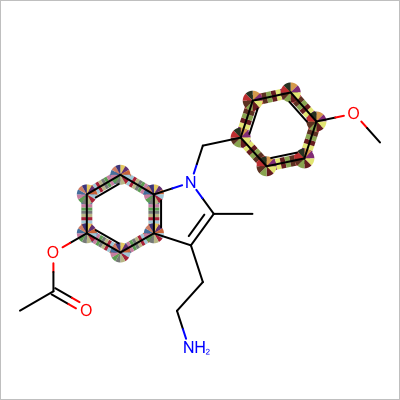

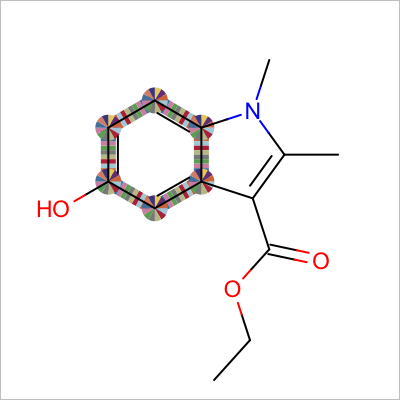

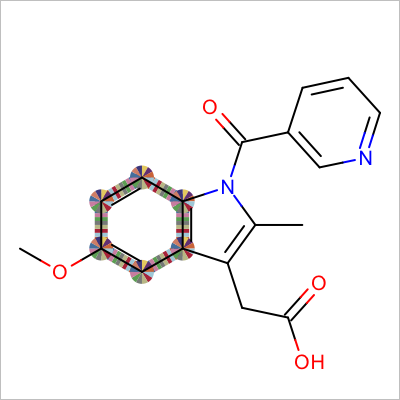

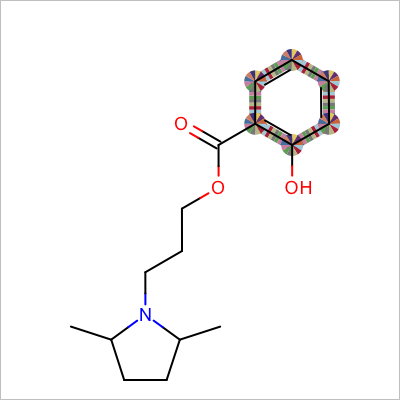

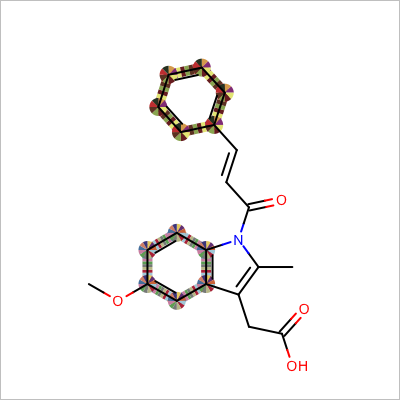

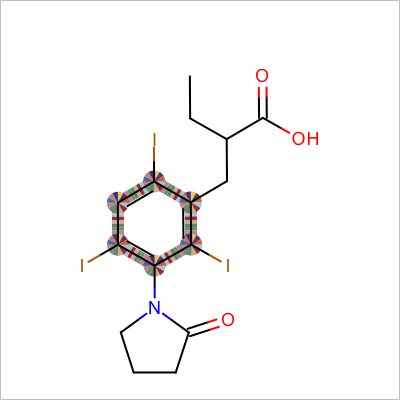

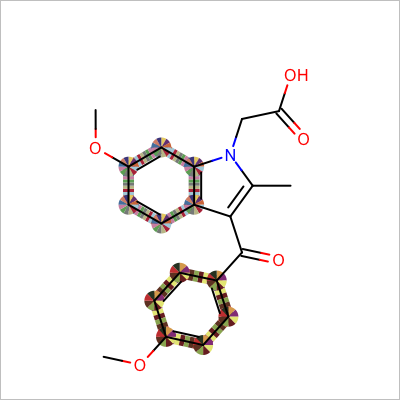

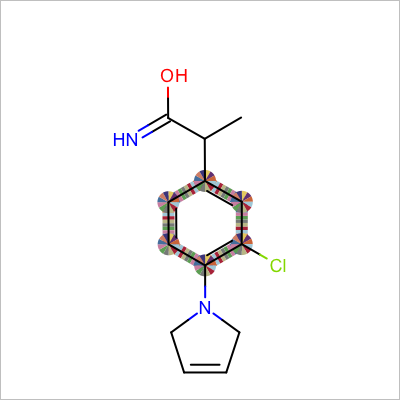

The number of matching molecules is: 12
The number of nonmatching molecules is: 0


In [29]:
#calling the function without the widget
MainSubstructure(file, smile)

In [30]:
#calling the function with the widget
from IPython.html import widgets
from ipywidgets import interactive
from IPython.display import Image, HTML, display

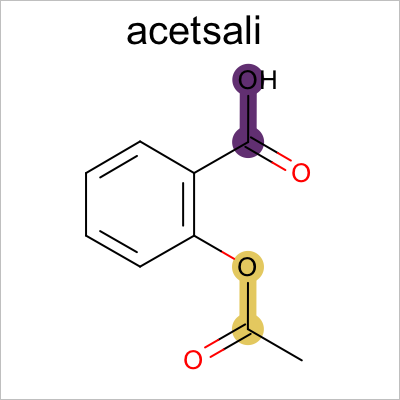

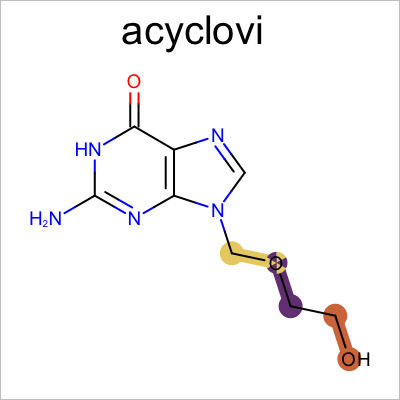

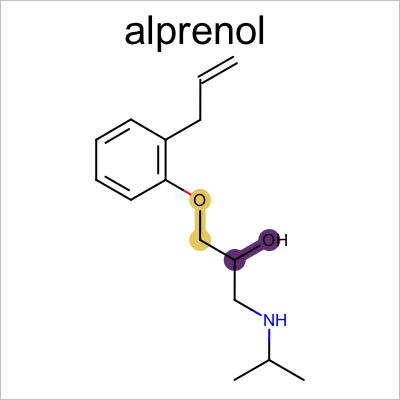

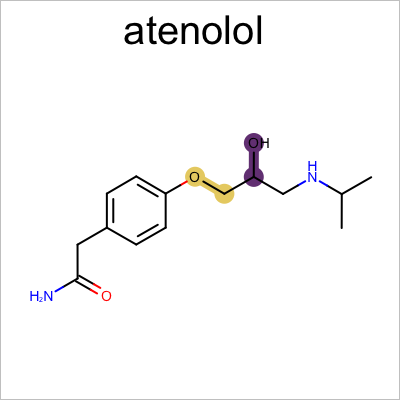

The number of matching molecules is: 4
The number of nonmatching molecules is: 2


In [31]:
file_input = widgets.Text()
smile_input = widgets.Text()
w = interactive(MainSubstructure, file = file_input, smile = smile_input)
display(w)
#whether want to throw errors
#import warnings
#warnings.filterwarnings('ignore')